In [2]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [3]:
data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Basic analysis of dataset

In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data.shape

(8523, 12)

In [8]:
# check for null values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###### As we see we have 2 column which is having missing values

In [9]:
# checking for categorical data
cat_col =[]
for x in data.dtypes.index:
    if data.dtypes[x]== 'object':
        cat_col.append(x)
cat_col        

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')

In [11]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
# print the categorical column
for col in cat_col:
    print(col)
    print(data[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

##### as we see Low Fat, LF and low repeated which is representing same value also Regular and reg so we can combine this column

In [13]:
# fill the missing value
Item_weight_mean =data.pivot_table(values ='Item_Weight', index='Item_Identifier')
Item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [14]:
miss_bool =data['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [15]:
for i, item in enumerate(data['Item_Identifier']):
    if miss_bool[i]:
        if item in Item_weight_mean:
            data['Item_Weight'][i]= Item_weight_mean.loc[item]['Item_Weight']
        else:
            data['Item_Weight'][i]= np.mean(data['Item_Weight'])

<ipython-input-15-b370b1dd5f4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Weight'][i]= np.mean(data['Item_Weight'])


In [16]:
Outlet_Size_Mode =data.pivot_table(values ='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
Outlet_Size_Mode 

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
miss_bool2 =data['Outlet_Size'].isnull()
miss_bool2

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [18]:
data.loc[miss_bool2, 'Outlet_Size']= data.loc[miss_bool2, 'Outlet_Type'].apply(lambda x: Outlet_Size_Mode[x])

In [19]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
# combine item fat content
data['Item_Fat_Content']= data['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
sum(data['Item_Visibility']==0)

526

In [22]:
# replace 0 with mean
data.loc[:, 'Item_Visibility'].replace([0], [data['Item_Visibility'].mean()], inplace= True)

In [23]:
sum(data['Item_Visibility']==0)

0

##### Creation of new attribute

In [24]:
data['New_Item_Type']=  data['Item_Identifier'].apply(lambda x:x[:2])
data['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [25]:
data['New_Item_Type']= data['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
data['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [26]:
data.loc[data['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content']= 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [28]:
# create small values for establishment year
data['Outlet_years']= 2013- data['Outlet_Establishment_Year']
data['Outlet_years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_years, Length: 8523, dtype: int64

##### Exploratory data analysis

In [29]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

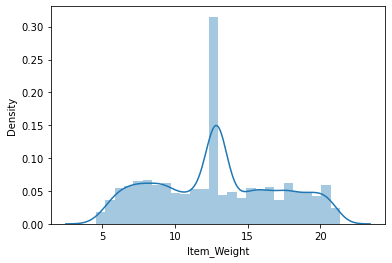

In [30]:
sns.distplot(data['Item_Weight'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

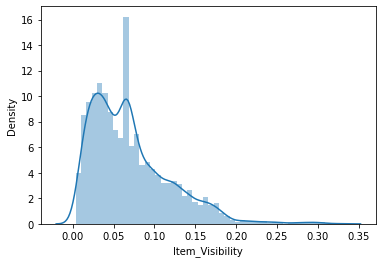

In [31]:
sns.distplot(data['Item_Visibility'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

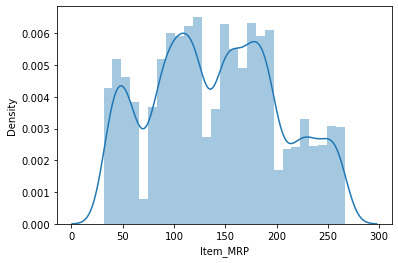

In [33]:
sns.distplot(data['Item_MRP'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

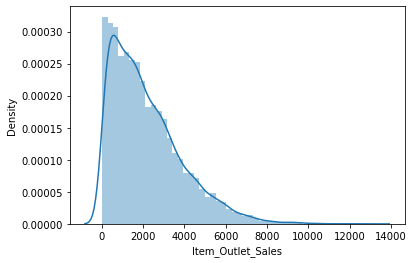

In [36]:
sns.distplot(data['Item_Outlet_Sales'])

In [37]:
#we see there is skew data so remove skewness

In [39]:
data['Item_Outlet_Sales']= np.log(1+data['Item_Outlet_Sales'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

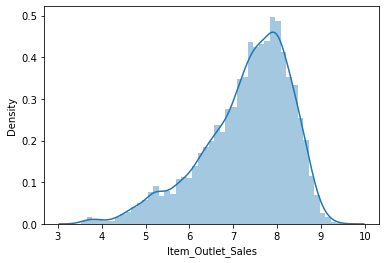

In [40]:
sns.distplot(data['Item_Outlet_Sales'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

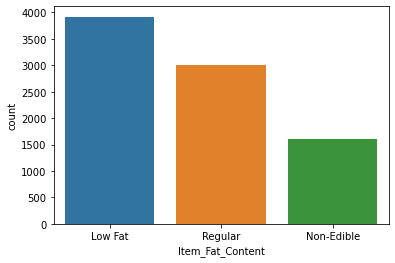

In [41]:
sns.countplot(data['Item_Fat_Content'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

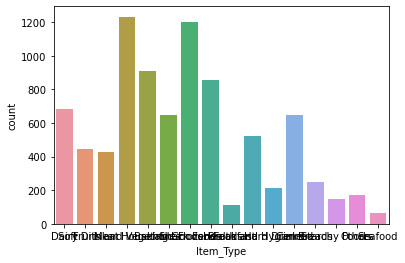

In [42]:
sns.countplot(data['Item_Type'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

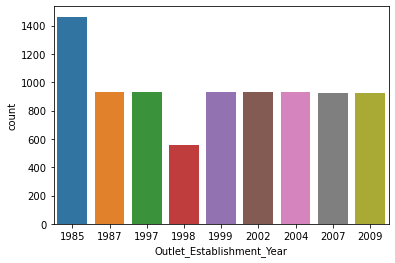

In [43]:
sns.countplot(data['Outlet_Establishment_Year'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

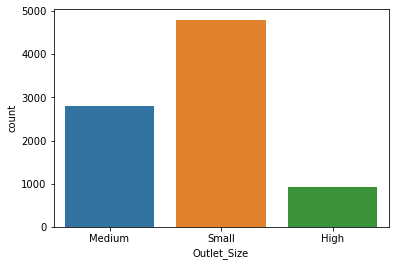

In [44]:
sns.countplot(data['Outlet_Size'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

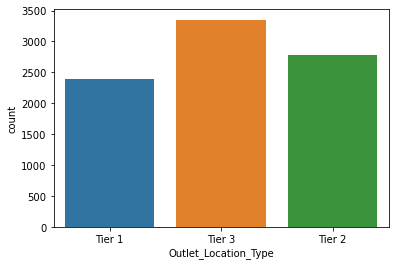

In [48]:

sns.countplot(data['Outlet_Location_Type'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

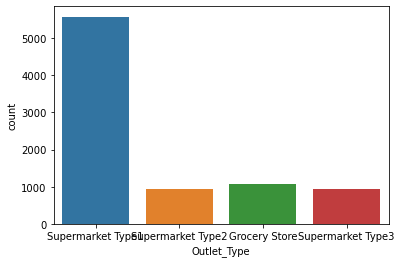

In [46]:
sns.countplot(data['Outlet_Type'])

## Corelation Matrix

<AxesSubplot:>

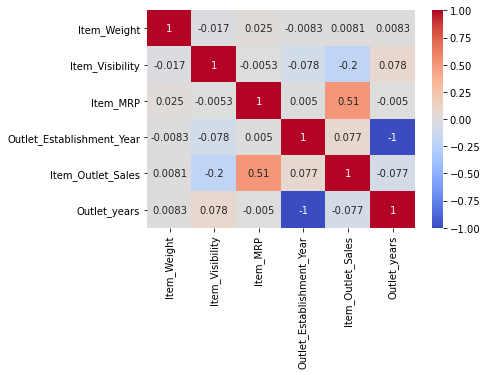

In [50]:
corr= data.corr()
sns.heatmap(corr, annot= True, cmap='coolwarm')

###### from this we conclude that outlet_Establishment_year is highly negative correalted with Outlet_Years, so we can remove that
column also Item_MRP has majorly contributing in our Item_outlet_sales

# Label Encoding

In [52]:
le= LabelEncoder()

In [53]:
data['Outlet']= le.fit_transform(data['Outlet_Identifier'])
cat_col= ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    data[col]=le.fit_transform(data[col])

Onehot encoding

In [54]:
data= pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


### Train Test split

In [57]:
x= data.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y= data['Item_Outlet_Sales']

In [58]:
x

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.300,0.016047,4,249.8092,14,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,14,48.2692,4,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,10,141.6180,14,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.066132,6,182.0950,15,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.066132,9,53.8614,26,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,26,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,0,108.1570,11,7,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,8,85.1224,9,6,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,13,103.1332,4,3,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [59]:
y

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, x,y):
    #train the model
    model.fit(x,y)
    #predict the training set
    pred= model.predict(x)
    #perfrom cross validation
    cv_score= cross_val_score(model, x,y, scoring='neg_mean_squared_error')
    cv_score =np.abs(np.mean(cv_score))
    print("model report")
    print("RMSE:",mean_squared_error(y,pred))
    print("CV score:",cv_score)

In [67]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

model report
RMSE: 0.2880870435254152
CV score: 0.2892475435843431


<AxesSubplot:title={'center':'Model Coefficient'}>

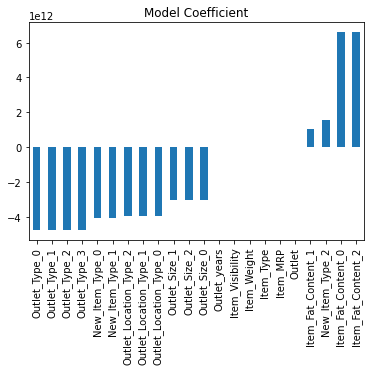

In [69]:
model= LinearRegression(normalize=True)
train(model, x,y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficient')

model report
RMSE: 0.4280298560568361
CV score: 0.4289289251562643


<AxesSubplot:title={'center':'Model Coefficient'}>

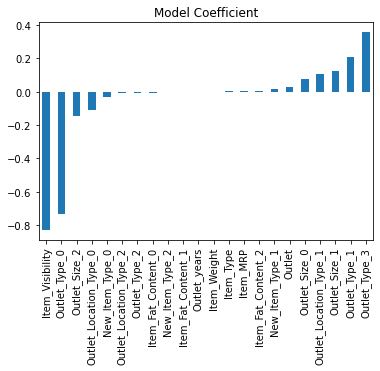

In [70]:
model= Ridge(normalize=True)
train(model, x,y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficient')

model report
RMSE: 0.7628688679102086
CV score: 0.7630789166281843


<AxesSubplot:title={'center':'Model Coefficient'}>

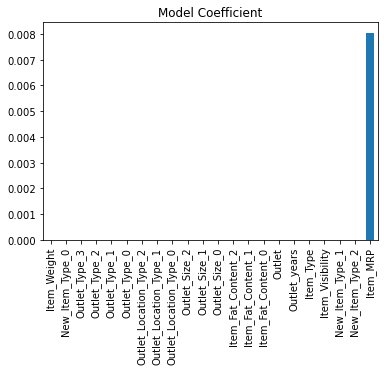

In [71]:
model= Lasso()
train(model, x,y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficient')

model report
RMSE: 5.5534030638578795e-34
CV score: 0.5771357053337378


<AxesSubplot:title={'center':'feature importance'}>

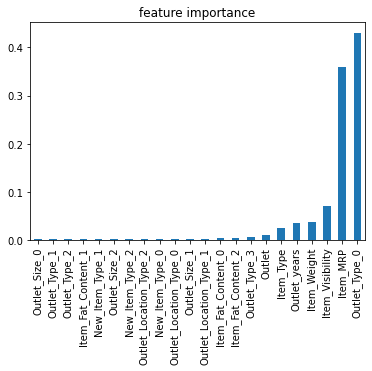

In [73]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
train(model, x,y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values()
coef.plot(kind='bar', title='feature importance')

model report
RMSE: 0.04225760330134571
CV score: 0.31075269094199587


<AxesSubplot:title={'center':'feature importance'}>

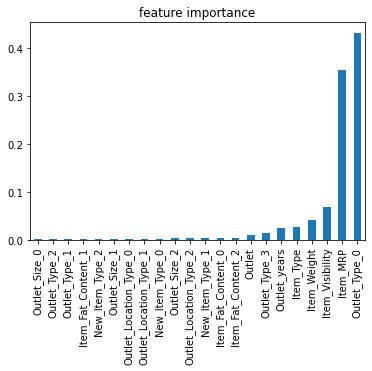

In [77]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
train(model, x,y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values()
coef.plot(kind='bar', title='feature importance')

In [78]:
# we have tried these model and which is having less CV score that is our best model so LinearRegression is best model

In [79]:
import pickle

In [80]:
filename= 'Big data mart sale prediction project'
pickle.dump(model, open(filename,'wb'))